## Ejercicios de pair programming 18 enero: Intro a Machine Learning

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import deepl   #Importamos una libreria para intentar traducir los paises del Aleman al Ingles


In [21]:
df = pd.read_csv("../datos/world_risk_index.csv")

In [22]:
df.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


### Info columnas
|Columna| Tipo de dato | Descripcion |
|-------|--------------|-------------|
|Region| String|	Name of the region.
|WRI	| Decimal |	World Risk Score of the region.
|Exposure	| Decimal |	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
|Vulnerability	| Decimal |	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Susceptibility	| Decimal |	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Lack of Coping Capabilities	| Decimal |	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
|Lack of Adaptive Capacities| Decimal |	Adaptive capacities related to coming natural events, climate change, and other challenges.
|Year	| Decimal |	Year data is being described.
|WRI Category| String|	WRI Category for the given WRI Score.
|Exposure Category| String|	Exposure Category for the given Exposure Score.
|Vulnerability Categoy| String|	Vulnerability Category for the given Vulnerability Score.
|Susceptibility Category| String|	Susceptibility Category for the given Susceptibility Score.

Link a la base de datos : https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

### Nuestra variable respuesta es Exposure, queremos saber cual es el riesgo de desastres naturales dependiendo del resto de variables

Nuestra variable respuesta será Exposure para poder predecir cual el riesgo de un desastre natural en una región determinada

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [23]:
df.shape

(1917, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WRI,1917.0,7.551763,5.553257,0.02,3.7400,6.52,9.400,56.71
Exposure,1917.0,15.388336,10.240135,0.05,10.1600,12.76,16.450,99.88
Vulnerability,1917.0,48.075759,13.835666,14.31,37.0400,47.10,60.060,76.47
Susceptibility,1917.0,30.739431,15.667030,8.26,17.7900,25.40,42.640,70.83
Lack of Coping Capabilities,1917.0,70.438289,15.038854,31.59,59.3300,74.23,83.000,94.36
Lack of Adaptive Capacities,1916.0,43.090511,13.551156,11.16,33.1925,43.08,53.065,76.11
Year,1917.0,2016.049557,3.182045,2011.00,2013.0000,2016.00,2019.000,2021.00


In [26]:
df.describe(include = 'O').T

,count,unique,top,freq
Region,1917,306,Vanuatu,11
Exposure Category,1917,5,Very Low,393
WRI Category,1916,5,Very Low,393
Vulnerability Category,1913,5,Very Low,386
Susceptibility Category,1917,5,Very Low,390


In [27]:
df.Region.value_counts() #Tendremos que limpiar el data set ya que hay regiones escritas en diferentes idiomas o con diferente descripción

Vanuatu                          11
Lesotho                          11
Turkmenistan                     11
Eritrea                          11
Peru                             11
                                 ..
Zentralafrik. Republik            1
Ver. Arabische Emirate            1
Eswatini                          1
T. f. Yugo. Rep. of Macedonia     1
Korea Republic of 4.59            1
Name: Region, Length: 306, dtype: int64

In [28]:
regiones = list(df.Region.unique())

In [29]:
regiones

['Vanuatu',
 'Tonga',
 'Philippinen',
 'Salomonen',
 'Guatemala',
 'Bangladesch',
 'Timor-Leste',
 'Costa Rica',
 'Kambodscha',
 'El Salvador',
 'Nicaragua',
 'Papua-Neuguinea',
 'Madagaskar',
 'Brunei Darussalam',
 'Afghanistan',
 'Niger',
 'Gambia',
 'Bhutan',
 'Fidschi',
 'Guinea-Bissau',
 'Jamaika',
 'Tschad',
 'Honduras',
 'Dominikanische Republik',
 'Chile',
 'Mauritius',
 'Senegal',
 'Indonesien',
 'Burkina Faso',
 'Burundi',
 'Mali',
 'Haiti',
 'Sierra Leone',
 'Vietnam',
 'Japan',
 'Benin',
 'Togo',
 'Kamerun',
 'Albanien',
 'Mosambik',
 'Mauretanien',
 'Simbabwe',
 'Guinea',
 'Kap Verde',
 'Usbekistan',
 'Ghana',
 'Suriname',
 'Sudan',
 'Liberia',
 'Nigeria',
 'Elfenbeinküste',
 'Guyana',
 'Malawi',
 'Ecuador',
 'Ruanda',
 'Tansania',
 'Myanmar',
 'Kirgisistan',
 'Sambia',
 'Äthiopien',
 'Algerien',
 'Angola',
 'Samoa',
 'Lesotho',
 'Sri Lanka',
 'Pakistan',
 'Kenia',
 'Kongo',
 'Niederlande',
 'Panama',
 'Indien',
 'Uganda',
 'Tadschikistan',
 'Swasiland',
 'Peru',
 'Eritrea

In [30]:
df['Region'].unique()

array(['Vanuatu', 'Tonga', 'Philippinen', 'Salomonen', 'Guatemala',
       'Bangladesch', 'Timor-Leste', 'Costa Rica', 'Kambodscha',
       'El Salvador', 'Nicaragua', 'Papua-Neuguinea', 'Madagaskar',
       'Brunei Darussalam', 'Afghanistan', 'Niger', 'Gambia', 'Bhutan',
       'Fidschi', 'Guinea-Bissau', 'Jamaika', 'Tschad', 'Honduras',
       'Dominikanische Republik', 'Chile', 'Mauritius', 'Senegal',
       'Indonesien', 'Burkina Faso', 'Burundi', 'Mali', 'Haiti',
       'Sierra Leone', 'Vietnam', 'Japan', 'Benin', 'Togo', 'Kamerun',
       'Albanien', 'Mosambik', 'Mauretanien', 'Simbabwe', 'Guinea',
       'Kap Verde', 'Usbekistan', 'Ghana', 'Suriname', 'Sudan', 'Liberia',
       'Nigeria', 'Elfenbeinküste', 'Guyana', 'Malawi', 'Ecuador',
       'Ruanda', 'Tansania', 'Myanmar', 'Kirgisistan', 'Sambia',
       'Äthiopien', 'Algerien', 'Angola', 'Samoa', 'Lesotho', 'Sri Lanka',
       'Pakistan', 'Kenia', 'Kongo', 'Niederlande', 'Panama', 'Indien',
       'Uganda', 'Tadschikistan', 

In [31]:
pais = 'St. Vincent und d. Grenadinen'

In [32]:
df.Year.unique() #Tenemos datos desde 2011 hasta 2021

array([2011, 2013, 2015, 2014, 2021, 2017, 2019, 2020, 2012, 2018, 2016])

In [33]:
df.isnull().sum()

Region                          0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    1
Year                            0
Exposure Category               0
WRI Category                    1
Vulnerability Category          4
Susceptibility Category         0
dtype: int64

In [34]:
df[df[' Lack of Adaptive Capacities'].isnull()] 

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1858,Korea Republic of 4.59,14.89,30.82,14.31,46.55,31.59,NaN,2016,Very High,Very High,NaN,High


In [35]:
# Mediante iterative imputer cumplimentamos el nulo de la columna Lack of Adaptive Capacities
numericas = df.select_dtypes(include = np.number)
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')
imputer.fit(numericas)
imputer.transform(numericas)
numericas_trans = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)
columnas = numericas_trans.columns
df.drop(columnas, axis = 1, inplace = True)
df[columnas] = numericas_trans[columnas]

In [36]:
df[df['Vulnerability Category'].isnull()] #Vemos donde tiene nulos la columna  Vulnerability Cateogory

,Region,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
1193,Österreich,Medium,Very Low,NaN,Very Low,2.87,13.18,21.75,13.63,39.27,12.340000,2019.0
1202,Deutschland,Low,Very Low,NaN,Very Low,2.43,11.51,21.11,14.30,36.44,12.600000,2019.0
1205,Norwegen,Low,Very Low,NaN,Very Low,2.34,10.60,22.06,13.29,39.21,13.680000,2019.0
1858,Korea Republic of 4.59,Very High,Very High,NaN,High,14.89,30.82,14.31,46.55,31.59,-35.213013,2016.0


In [37]:
df[(df['Vulnerability']>14) & (df['Vulnerability']<23)] #Vemos que las categorías de vulnerability para los valores indicados de vulenerability que tienen valores similares a los nulos y los reemplazamos

,Region,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
857,Schweiz,Very Low,Very Low,Very Low,Very Low,2.04,9.01,22.68,13.97,38.92,15.140000,2021.0
1193,Österreich,Medium,Very Low,NaN,Very Low,2.87,13.18,21.75,13.63,39.27,12.340000,2019.0
1198,Dänemark,Low,Very Low,Very Low,Very Low,2.65,11.79,22.49,14.50,40.32,12.650000,2019.0
1202,Deutschland,Low,Very Low,NaN,Very Low,2.43,11.51,21.11,14.30,36.44,12.600000,2019.0
1205,Norwegen,Low,Very Low,NaN,Very Low,2.34,10.60,22.06,13.29,39.21,13.680000,2019.0
1209,Schweiz,Very Low,Very Low,Very Low,Very Low,2.05,9.00,22.73,13.43,39.05,15.730000,2019.0
1381,Deutschland,Low,Very Low,Very Low,Very Low,2.63,11.52,22.81,14.98,37.36,16.080000,2020.0
1716,Österreich,Medium,Very Low,Very Low,Very Low,2.92,13.91,20.97,14.41,35.16,13.330000,2018.0
1728,Deutschland,Low,Very Low,Very Low,Very Low,2.42,11.31,21.36,15.09,35.38,13.600000,2018.0
1732,Norwegen,Low,Very Low,Very Low,Very Low,2.29,10.30,22.21,14.20,37.59,14.840000,2018.0


In [38]:
df["Vulnerability Category"].replace(np.nan, 'Very Low', inplace = True)

In [39]:
df[df['WRI Category'].isnull()]

,Region,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
1292,Föd. Staaten v. Mikronesien,High,NaN,High,High,7.59,14.95,50.77,31.79,72.13,48.39,2020.0


In [40]:
df[(df['WRI']>7.50) & (df['WRI']<7.60)] #Vemos los valores que toma WRI Category para para los datos aprox y para el mismo país y lo cambiamos por High

,Region,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
71,Uganda,Low,Medium,Very High,Very High,7.57,11.68,64.87,54.80,86.94,52.86,2011.0
236,Kongo,Medium,High,Very High,Very High,7.57,11.65,64.96,55.63,85.28,53.99,2013.0
237,Serbien,Very High,High,Low,Low,7.53,18.05,41.75,18.67,66.96,39.61,2013.0
238,Komoren,Low,High,Very High,Very High,7.52,10.97,68.56,59.98,82.70,63.00,2013.0
404,Sambia,Low,High,Very High,Very High,7.55,11.37,66.46,62.29,79.97,57.11,2015.0
405,Swasiland,Medium,High,High,High,7.55,12.76,59.18,44.84,79.92,52.79,2015.0
406,Algerien,High,High,Medium,Medium,7.53,15.82,47.58,22.63,77.05,43.07,2015.0
579,Ethiopia,Low,High,Very High,Very High,7.57,11.12,68.12,57.73,80.24,66.38,2014.0
580,Congo,Medium,High,Very High,Very High,7.53,11.65,64.66,55.69,86.16,52.11,2014.0
762,Sri Lanka,High,Medium,Medium,Medium,7.55,15.99,47.19,23.05,76.35,42.17,2021.0


In [41]:
df["WRI Category"].replace(np.nan, 'High', inplace = True)

In [42]:
# Comprobamos que no hay nulos
df.isnull().sum()

Region                          0
Exposure Category               0
WRI Category                    0
Vulnerability Category          0
Susceptibility Category         0
WRI                             0
Exposure                        0
Vulnerability                   0
Susceptibility                  0
Lack of Coping Capabilities     0
 Lack of Adaptive Capacities    0
Year                            0
dtype: int64

In [43]:
#Cambiamos el nombre de las columnas y cambiamos los espacios por _
columnas_nuevas = {col :  col.strip().lower().replace(' ', '_') for col in df.columns}
df.rename(columns = columnas_nuevas, inplace = True)

In [44]:
df.columns

Index(['region', 'exposure_category', 'wri_category', 'vulnerability_category',
       'susceptibility_category', 'wri', 'exposure', 'vulnerability',
       'susceptibility', 'lack_of_coping_capabilities',
       'lack_of_adaptive_capacities', 'year'],
      dtype='object')

In [45]:
df.to_csv('../datos/world_risk_index2.csv') #Guardamos el csv con los cambios

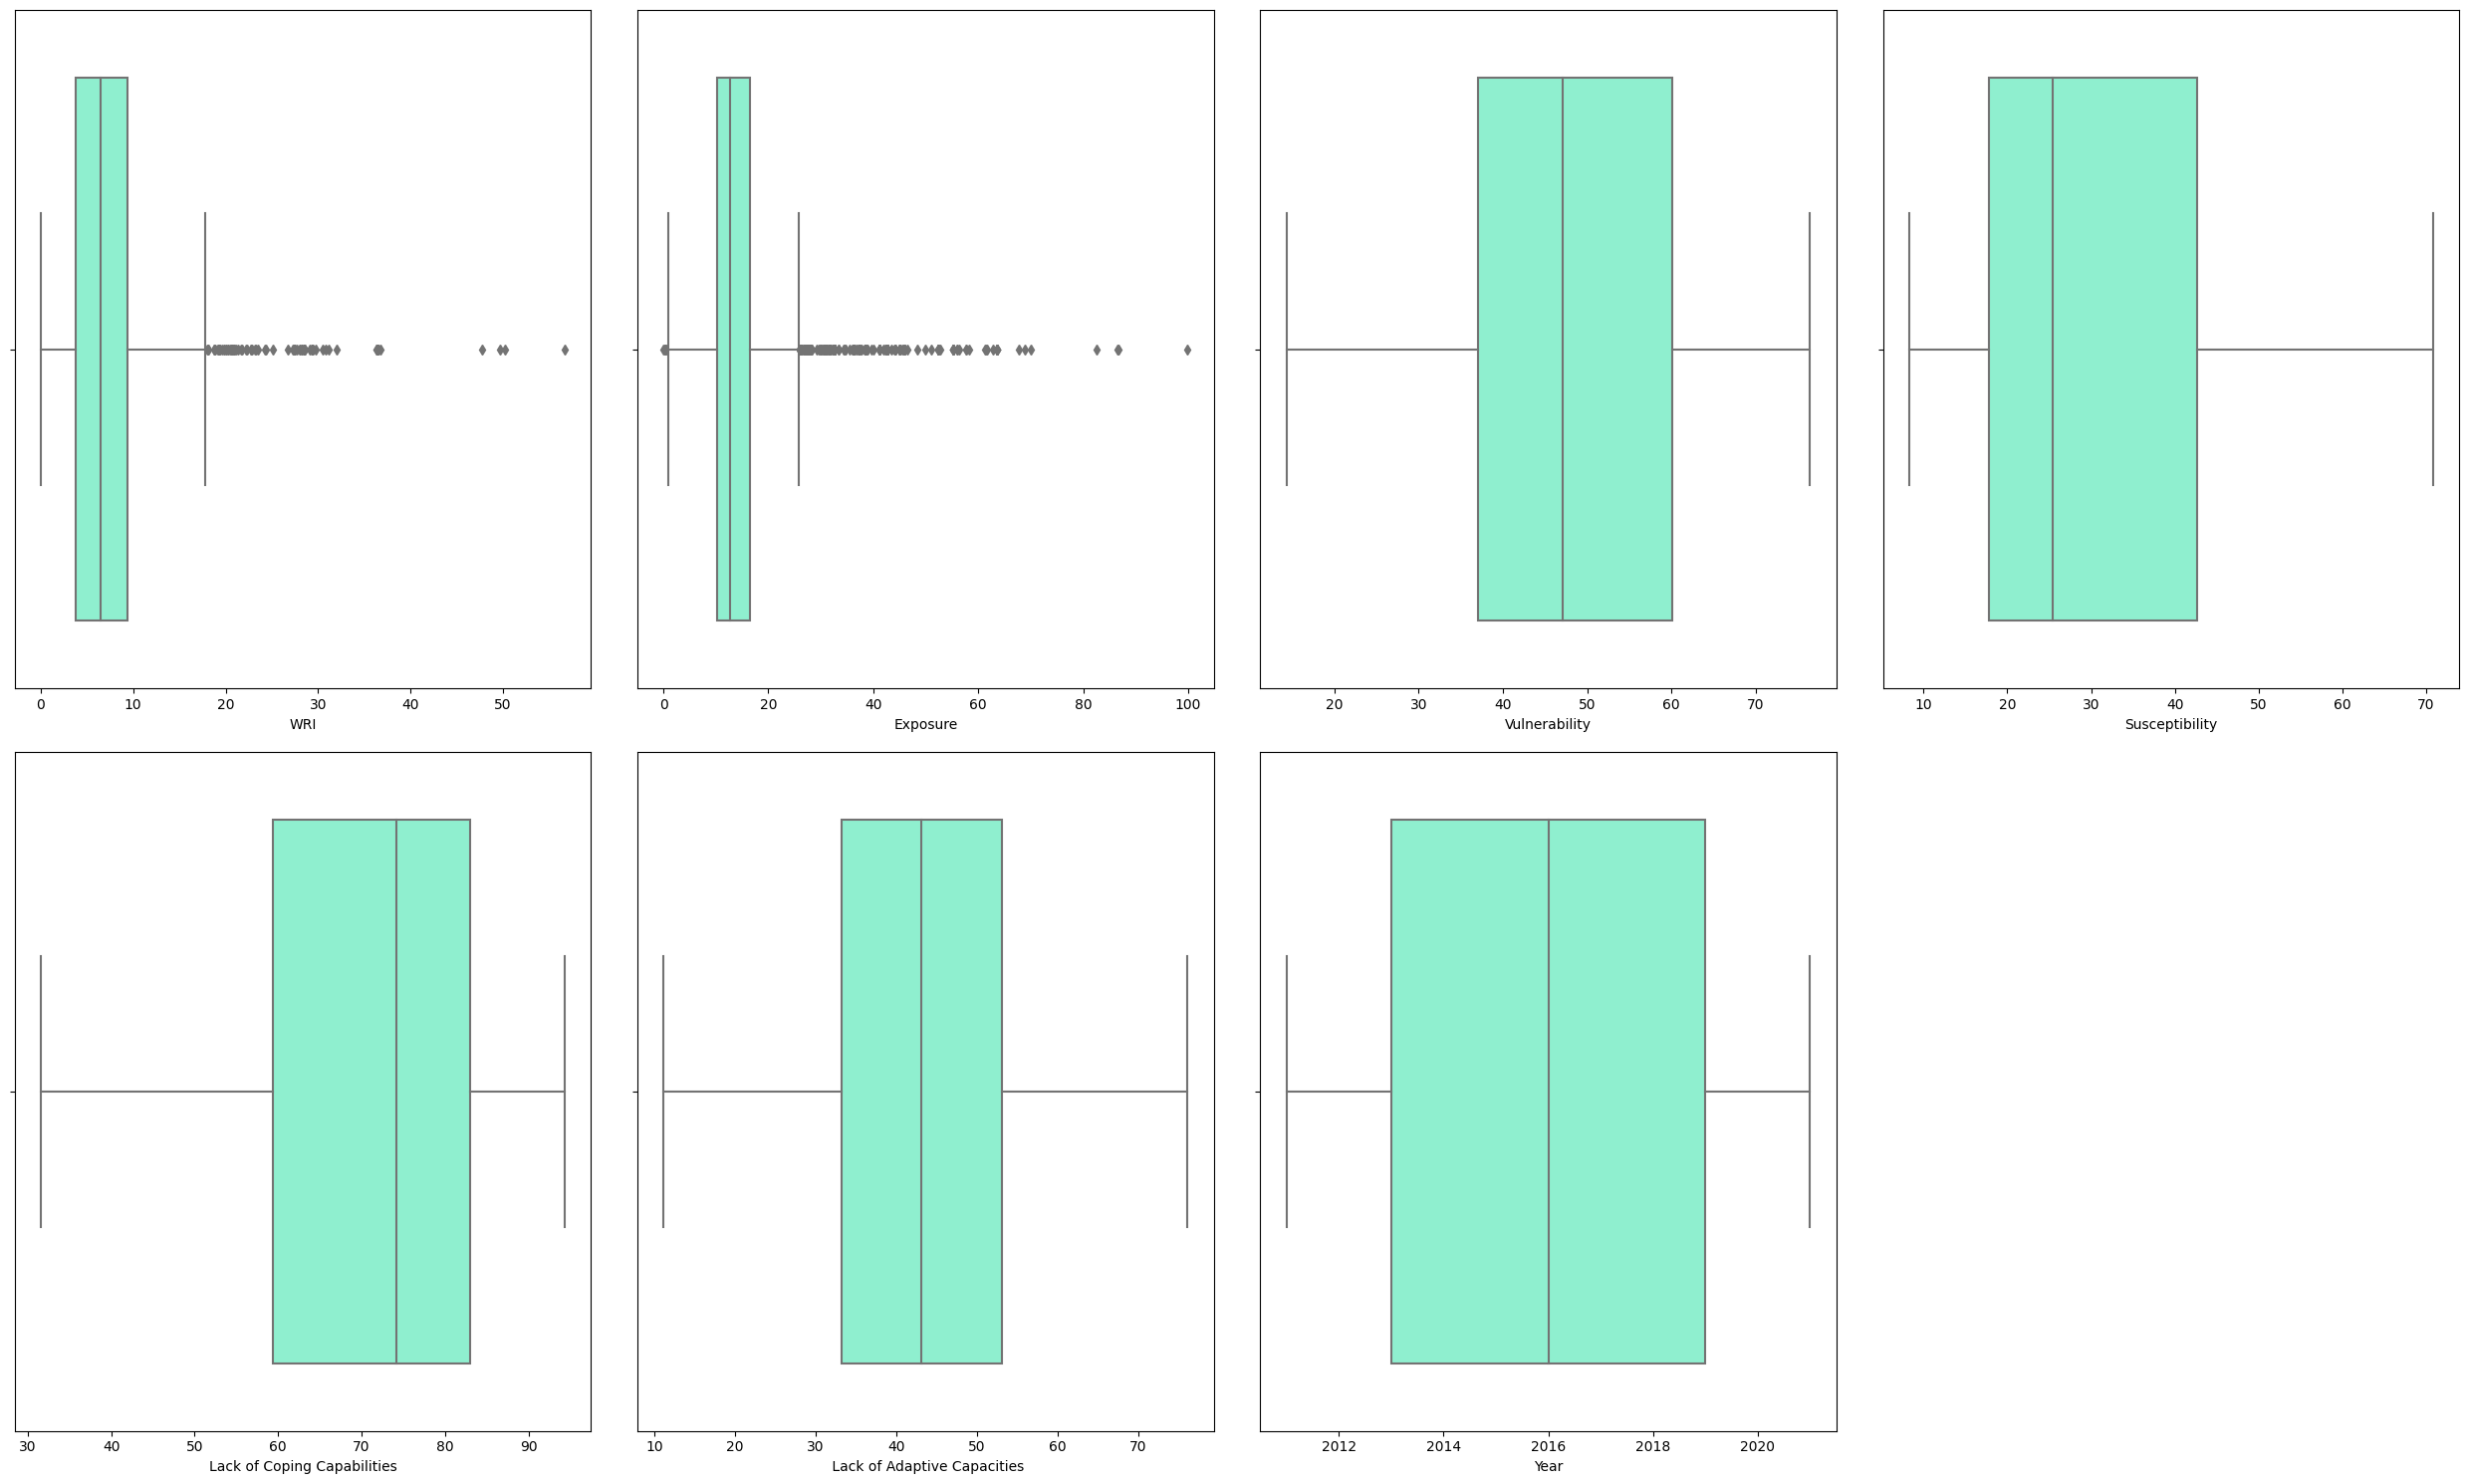

In [46]:
#Representamos para ver los outliers
fig, axes = plt.subplots(2, 4, figsize=(25,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [47]:
#Separamos los outliers para tener dos dataset para tener los outliers por un lado y otro limpio ya que hemos visto que tiene muchos outliers

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [48]:
#Hacemos una lista con las columnas y aplicamos la función a la columna de exposure para sacar los outilers
lista_columnas = list(numericas.columns)
ind = detectar_outliers(['exposure'], df)

In [49]:
#Hacemos una lista con los indices de los outliers
indices = list(ind.values())[0]

In [50]:
#Sacamos un df seleccionando todas las columnas y los indices de los outliers
df_outliers = df.iloc[indices, :]

In [51]:
df_outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [52]:
numericas_outliers = df_outliers.select_dtypes(include=['int64', 'float64'])
numericas_outliers.head(2)

,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,29.08,56.04,51.90,28.94,81.80,44.97,2011.0


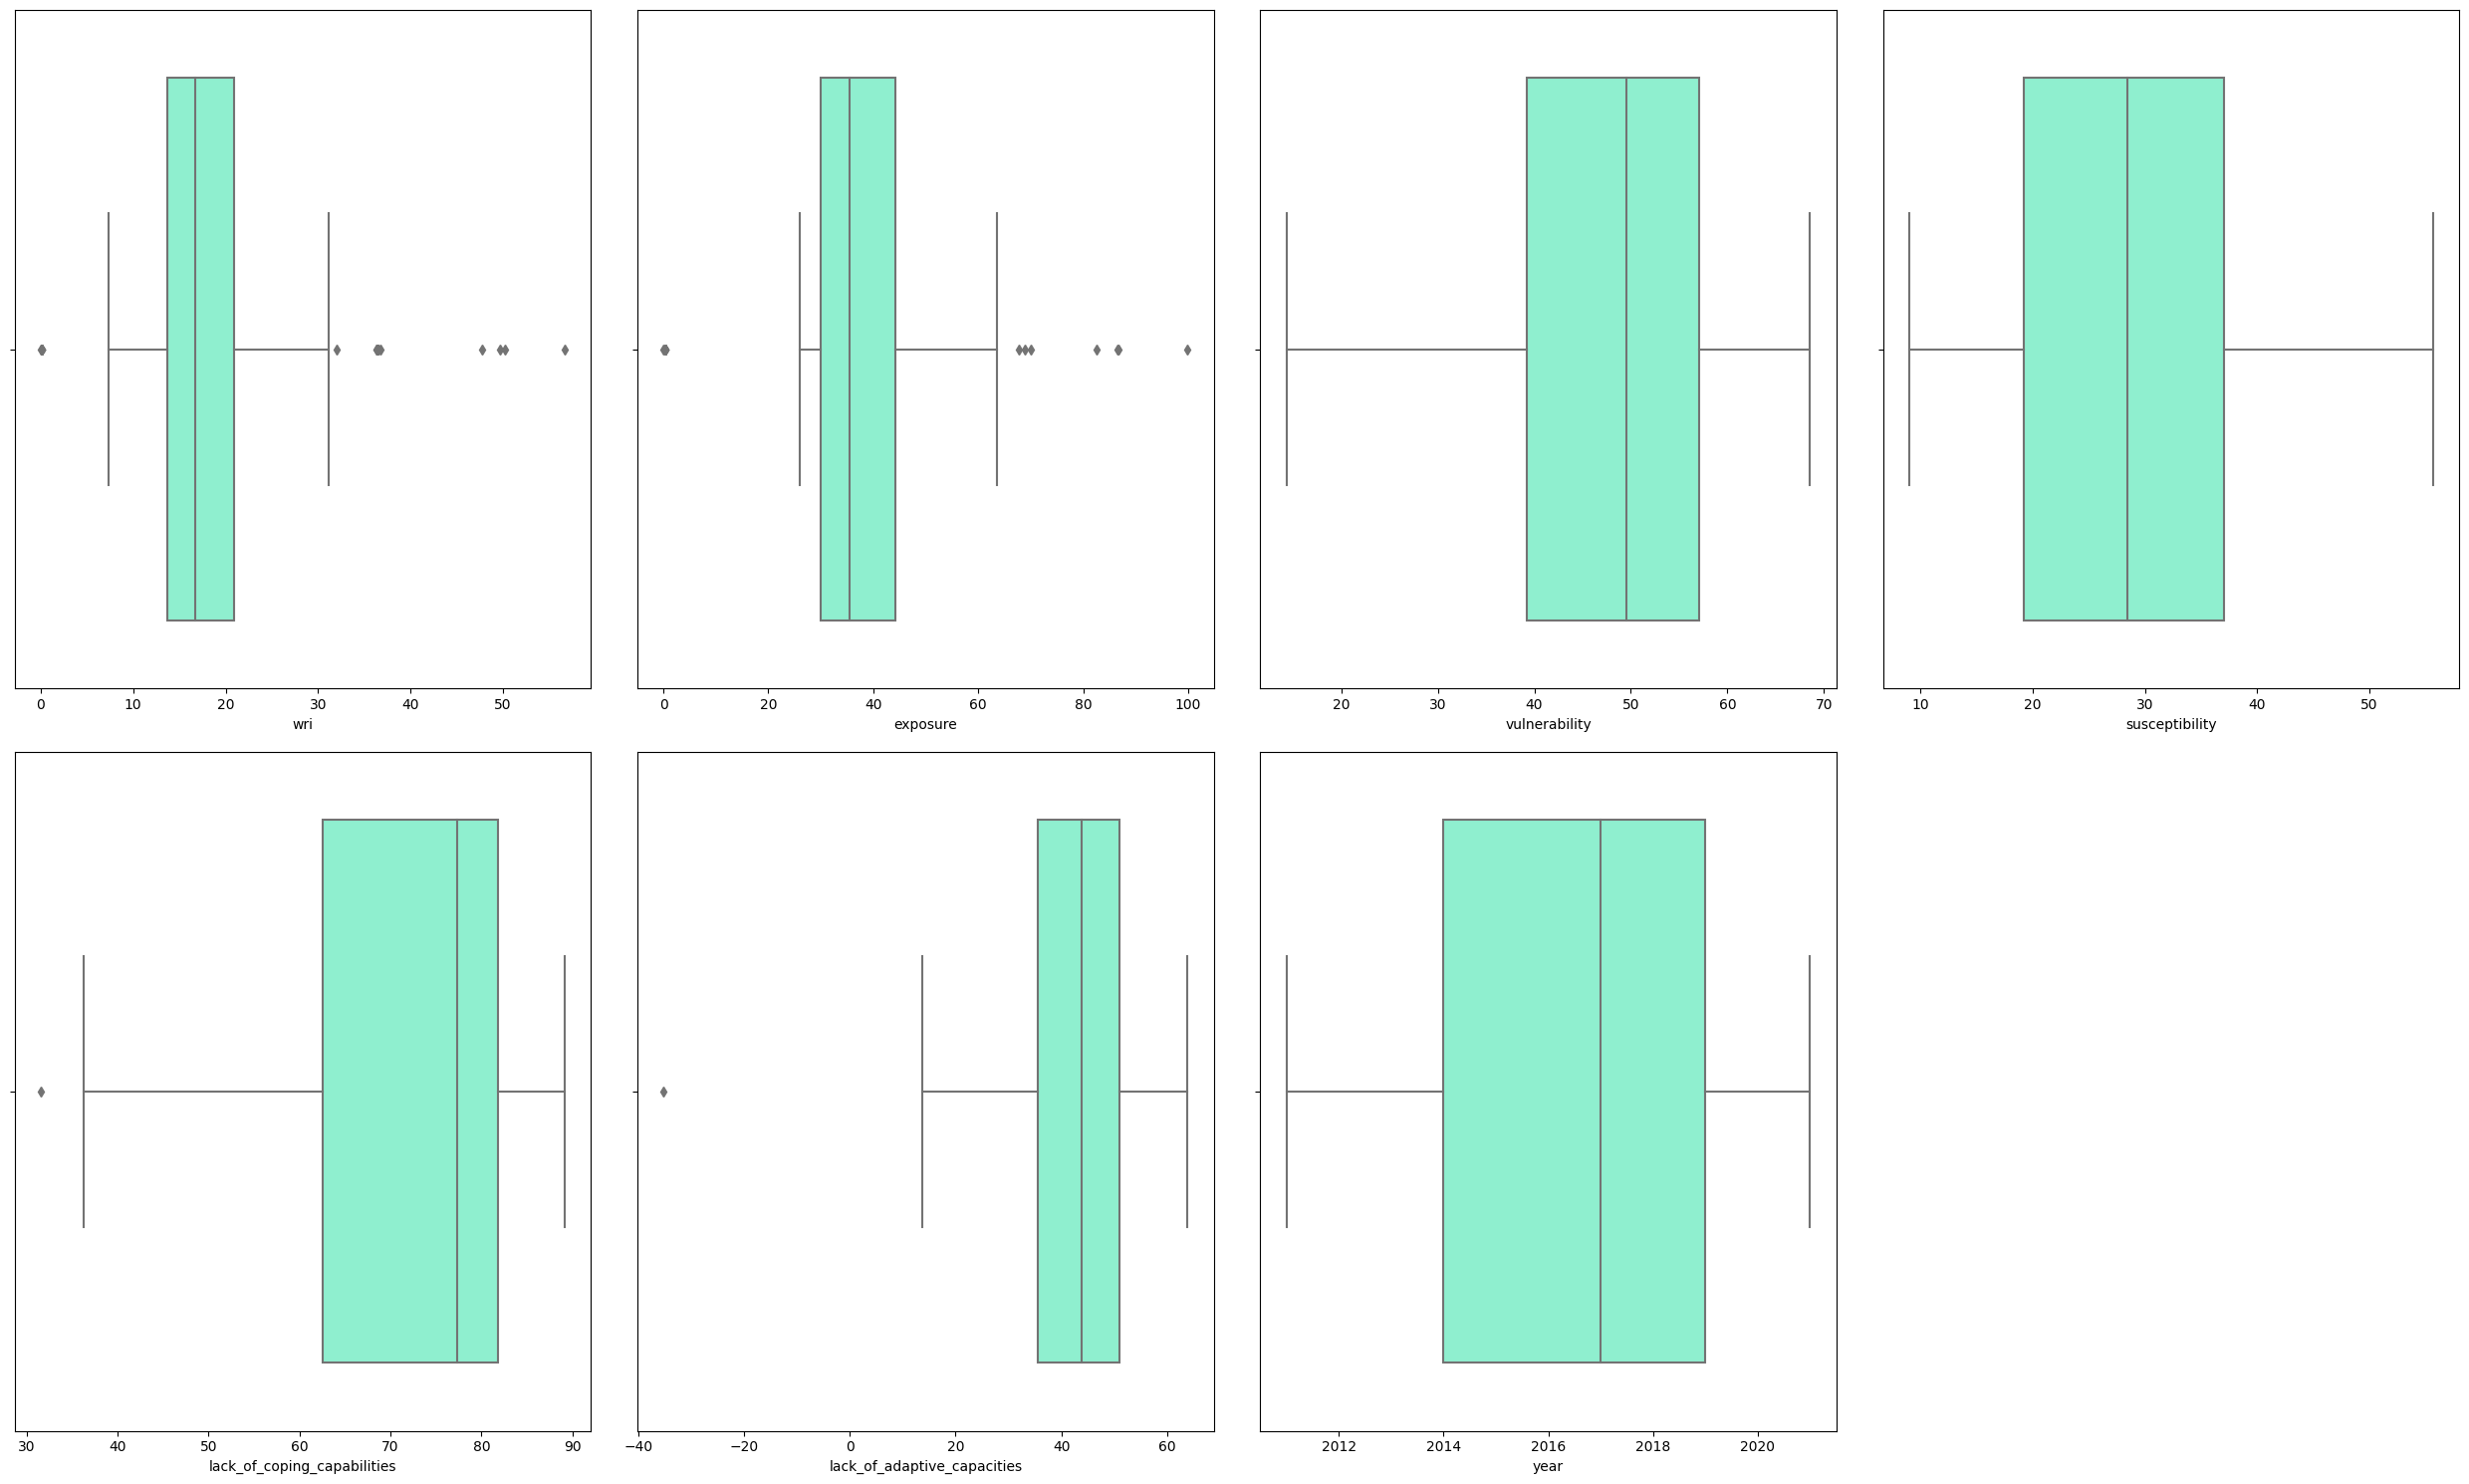

In [53]:
#Representamos los boxplots con el dataset de los outliers
fig, axes = plt.subplots(2, 4, figsize=(25,15))

axes = axes.flat

for indice, columna in enumerate(numericas_outliers.columns):
    sns.boxplot(x = numericas_outliers[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [54]:
#Eliminamos los outliers del dataset original
for k, v in ind.items():
    for i in v:
        df.drop(i, axis = 0, inplace = True)

In [55]:
df.shape

(1706, 12)

In [56]:
numericas_outliers = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
0,32.00,56.33,56.81,37.14,79.34,53.96,2011
1,29.08,56.04,51.90,28.94,81.80,44.97,2011


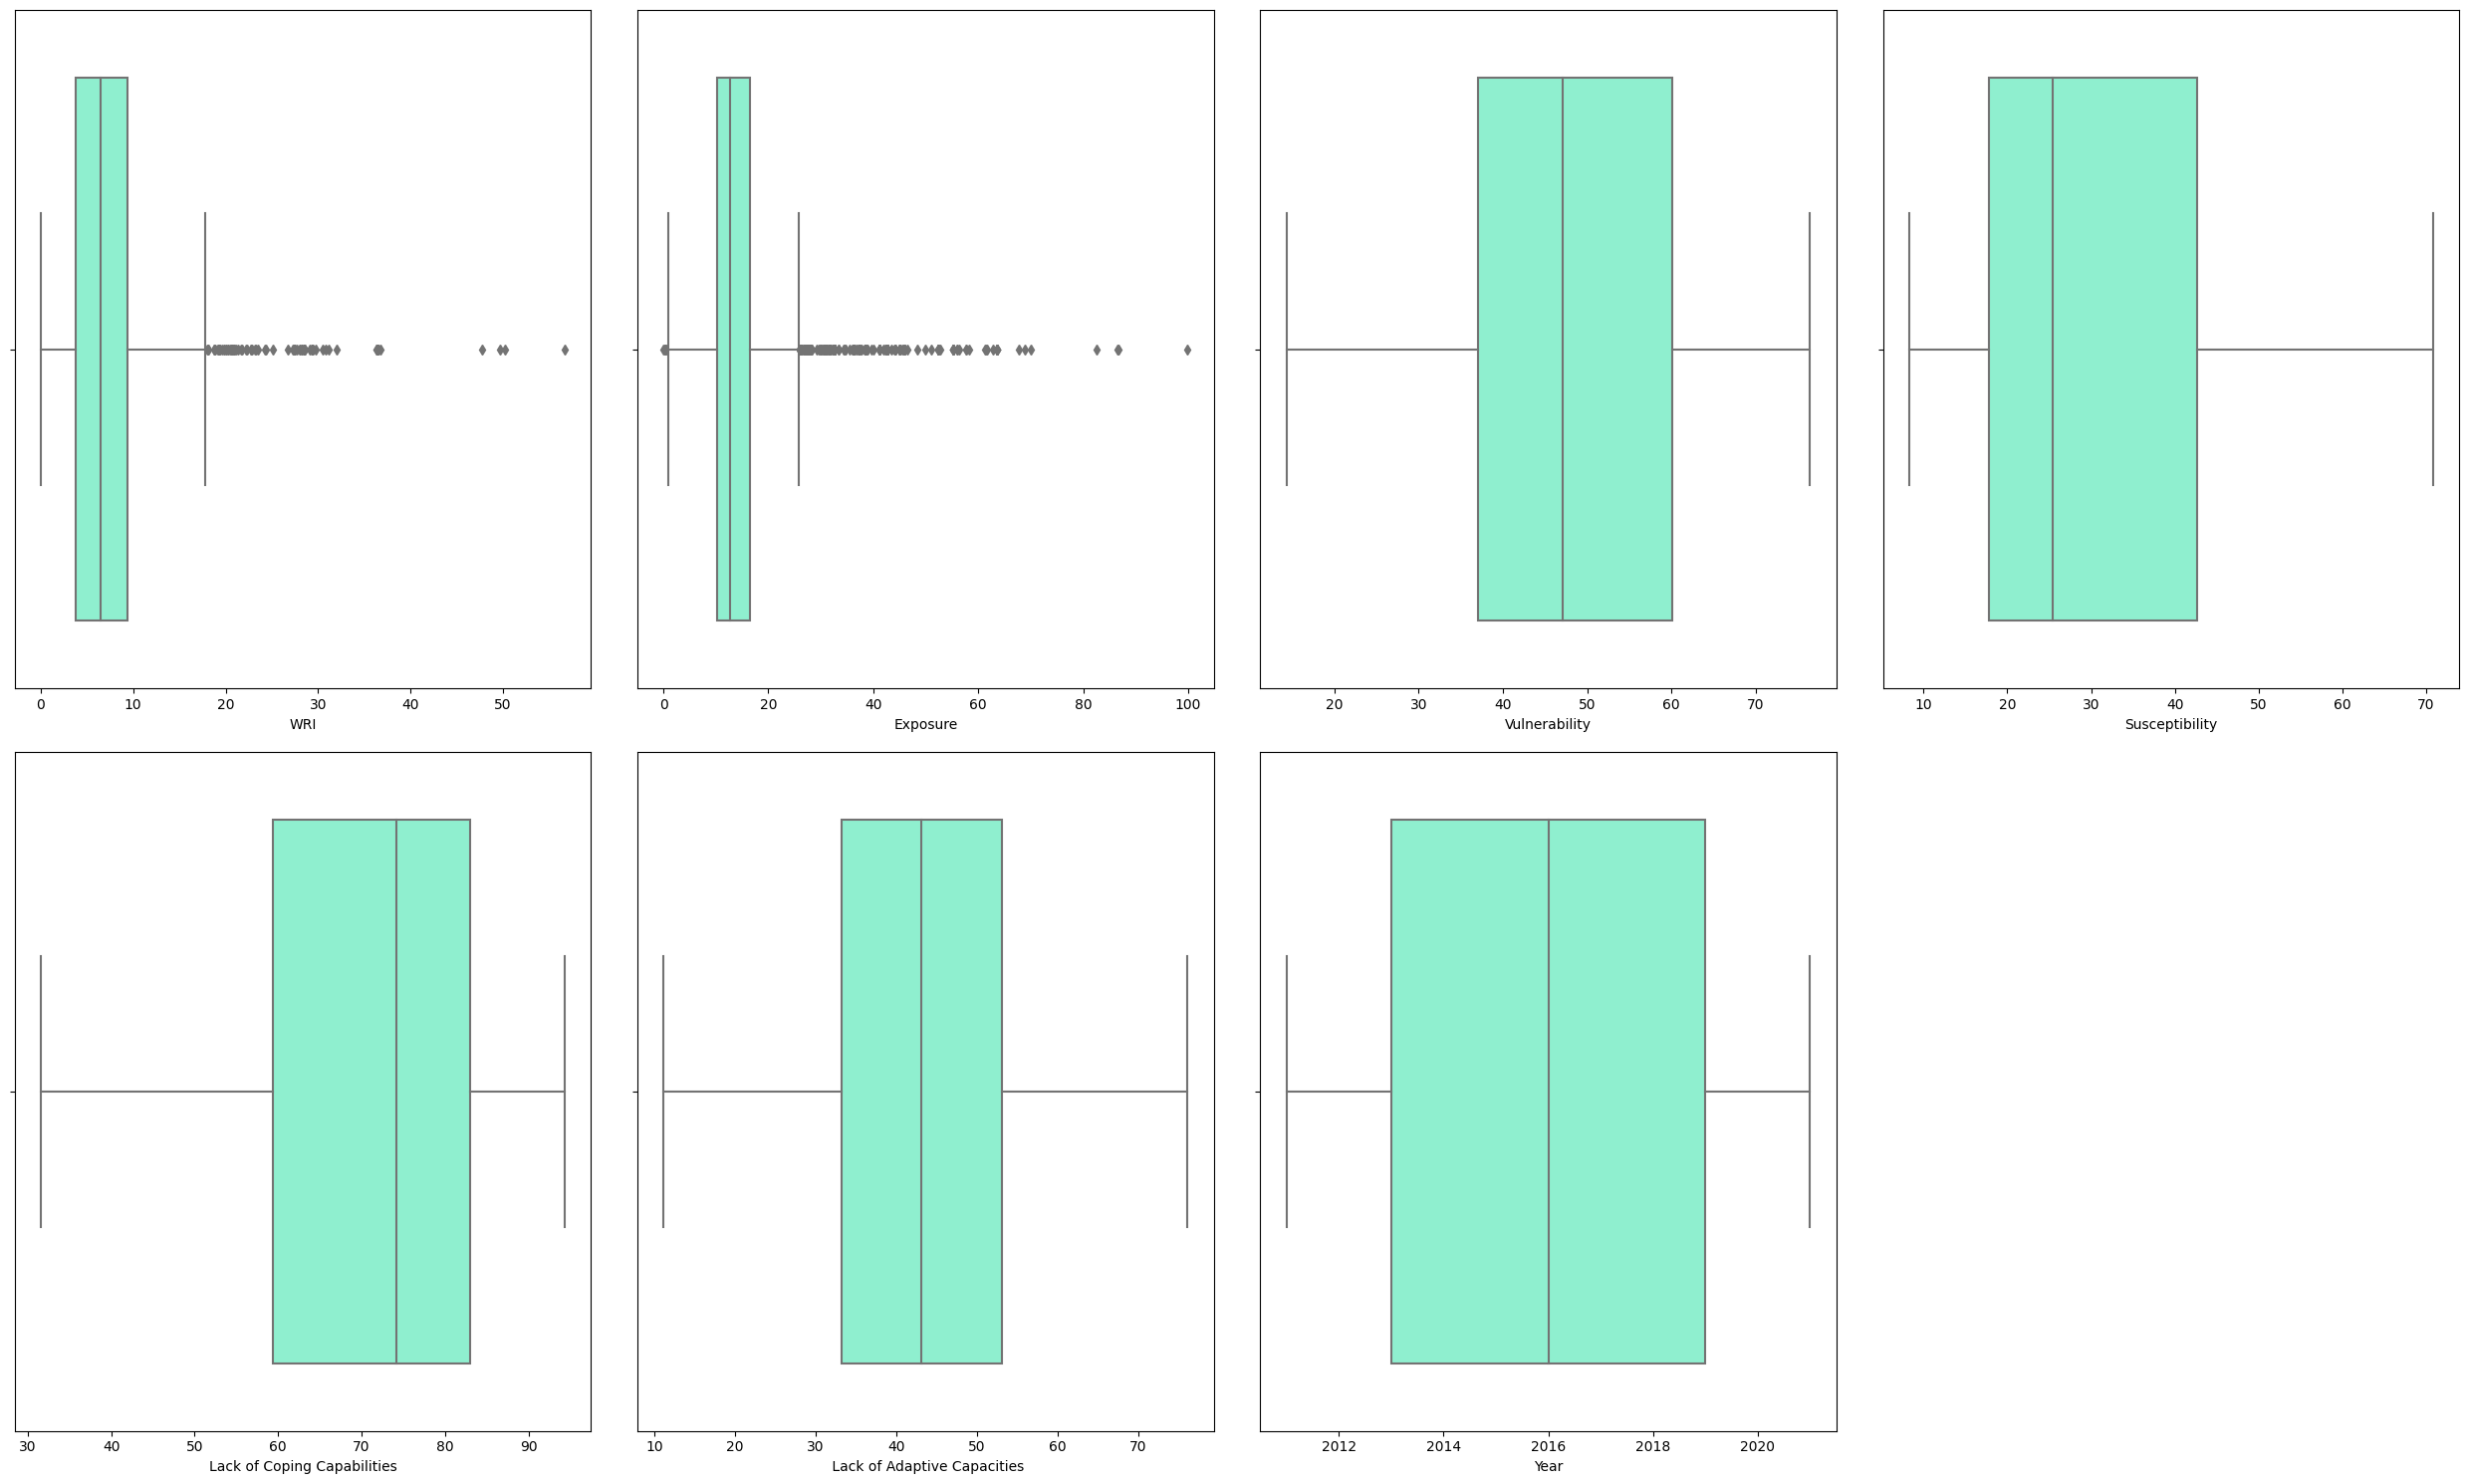

In [57]:
#Representamos los boxplots del dataset sin outliers
fig, axes = plt.subplots(2, 4, figsize=(25,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [58]:
#Guardamos el dataset sin outliers 
df.to_csv('../datos/world_risk_index_sin_outliers.csv')

In [59]:
#Guardamos el dataset solo de outliers
df_outliers.to_csv('../datos/world_risk_index_outliers.csv')